<a href="https://colab.research.google.com/github/varunbommagunta/TreeModels/blob/main/RandomForest/RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris   #load iris data
from sklearn import tree                 #tree module
from sklearn.model_selection import train_test_split    #for splitting the train and test data
from sklearn.metrics import accuracy_score   #To check the accuracy of our model
from sklearn.ensemble import RandomForestClassifier  #RFC model
import sklearn

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns                   #For plotting the data

In [3]:
iris = load_iris()  #load the data

In [4]:
dir(iris)  #Check the contents of the data

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
print(iris.DESCR)   #Description of the iris

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
type(iris)      #Bunch is special datastructure which holds the info about the data

sklearn.utils.Bunch

In [7]:
iris.feature_names   #feature namees

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target_names   #labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

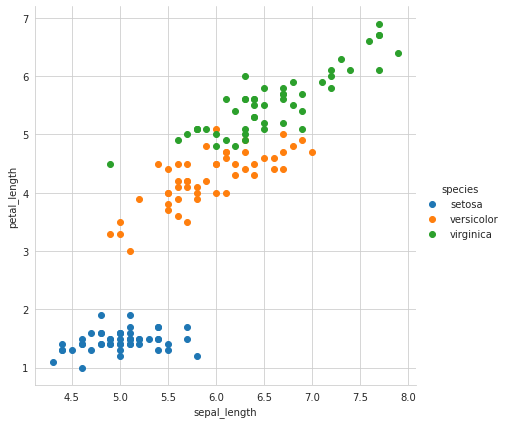

In [9]:
iris_data = sns.load_dataset('iris')   #plotting the data
sns.set_style("whitegrid")
sns.FacetGrid(iris_data, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal_length',
                              'petal_length').add_legend();

In [10]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size = 0.2,random_state = 4,shuffle = True)  #split the data into train and test split

In [11]:
X_train.shape

(120, 4)

In [12]:
X_test.shape

(30, 4)

In [13]:
clf = RandomForestClassifier(n_estimators = 7,random_state = 4).fit(X_train,y_train)       #Here we are taking 7 trees to get our predictions and fitting the model

In [14]:
type(clf)

sklearn.ensemble._forest.RandomForestClassifier

In [15]:
y_pred = clf.predict(X_test)    #predictions

In [16]:
def get_accuracy_for_each_estimator(model : sklearn.ensemble._forest.RandomForestClassifier) ->list:  #Function which takes a model and returns the accuracy
  n_estimators = len(model.estimators_)                                                           #score for each estimator (n = 7)
  l = []
  for i in range(n_estimators):
    y_pred = model.estimators_[i].predict(X_test)         #model.estimator_[index] gives the specified tree
    l.append(accuracy_score(y_test,y_pred))
  return l

In [17]:
accuracy_scores = get_accuracy_for_each_estimator(clf)

In [18]:
accuracy_scores

[0.9,
 0.9333333333333333,
 0.9666666666666667,
 0.8666666666666667,
 0.9,
 0.9,
 0.9333333333333333]

In [19]:
accuracy_score(y_test,y_pred)   #96% is a great accuracy score

0.9666666666666667

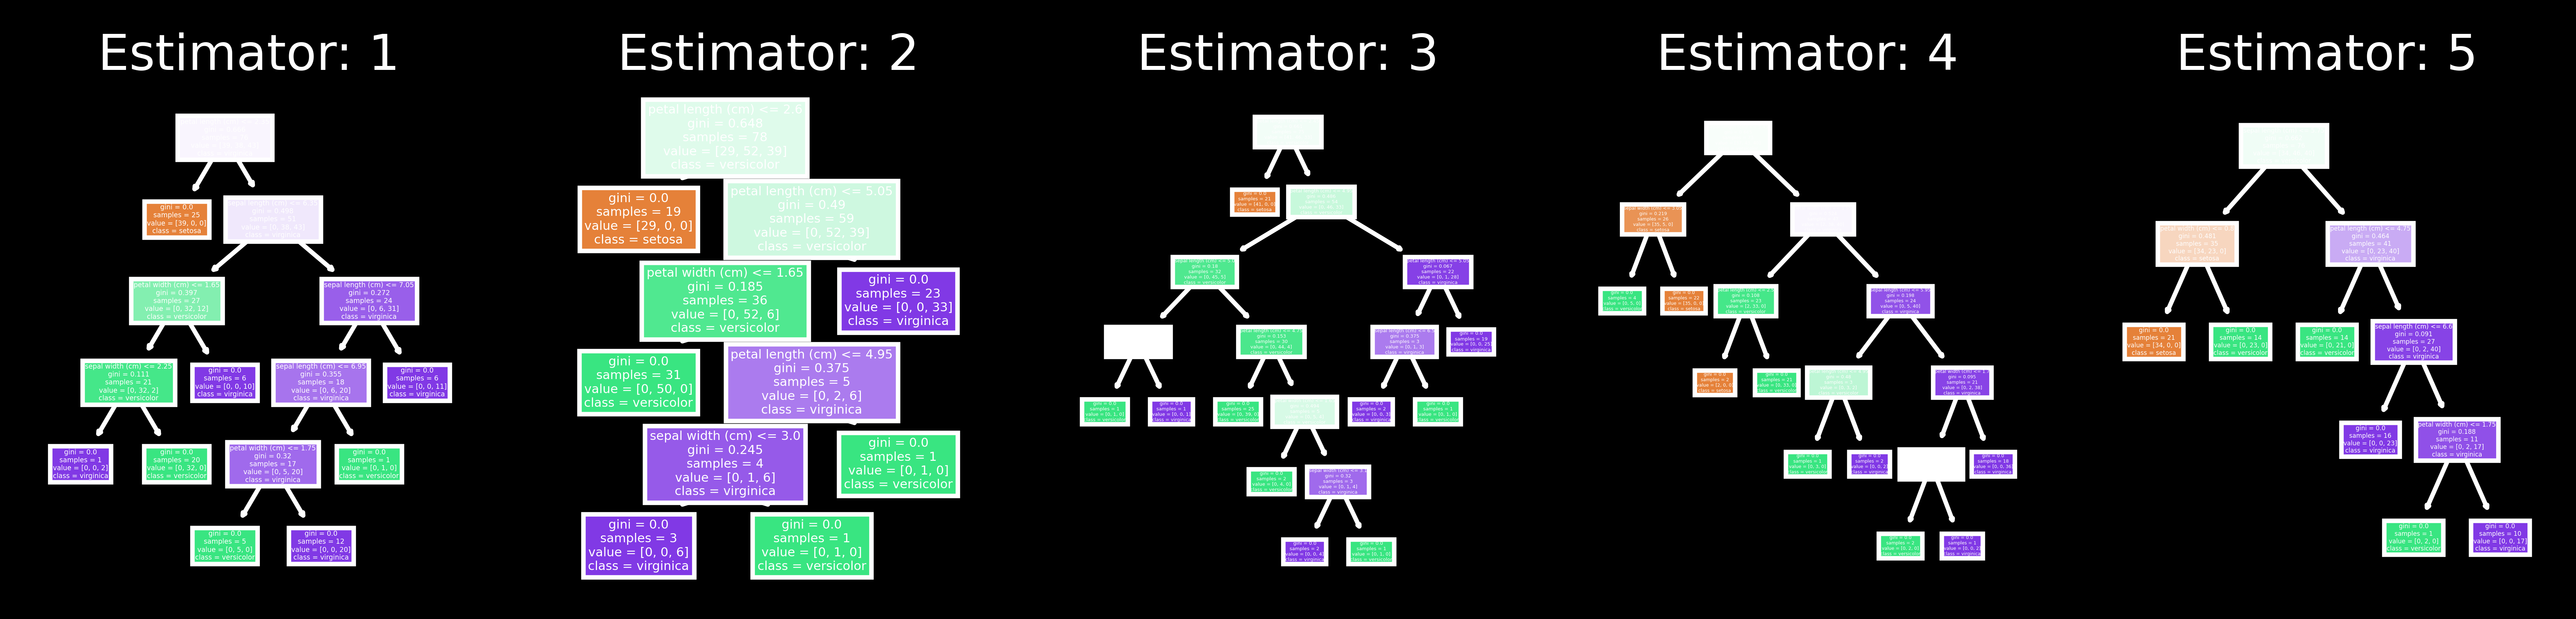

In [20]:
fn=iris.feature_names
cn=iris.target_names
plt.style.use('dark_background')
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(clf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index+1), fontsize = 11)